In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb


In [2]:
model_names = ["auto_123", "auto_124", "auto_234", "ldm_45", "ldm_35", "ldm_15"]

models = ["2024-01-31T11-20-10_jump_autoencoder__o123__fov512",
          "2024-02-02T10-32-54_jump_autoencoder__o124__fov512",
          "2024-02-02T10-32-54_jump_autoencoder__o234__fov512",
          "2024-02-01T14-51-40_jump__ldm__vq4__ref45__o123__fov512_0.5",
          "2024-02-12T17-47-16_jump__ldm__vq4__ref35__o124__fov512_0.5",
          "2024-02-12T17-46-57_jump__ldm__vq4__ref15__o234__fov512_0.5"]

data = [pd.read_csv(f"data/basic/{model}.csv") for model in models]

In [3]:
chan_to_organelle = {"1":"Mitochondria", "2":"AGP", "3":"NucleoliRNA", "4":"ER", "5":"DAPI"}

In [4]:
means = []
stds = [] 

for i, df in enumerate(data):
    mean = pd.DataFrame(df.mean().to_frame().T, columns=df.columns)
    std = pd.DataFrame(df.std().to_frame().T, columns=df.columns)
    mean["model"] = model_names[i]
    std["model"] = model_names[i]
    means.append(mean)
    stds.append(std)

means = pd.concat(means).set_index("model")
stds = pd.concat(stds).set_index("model")
means.to_csv(f"data/stats/means.csv")
stds.to_csv(f"data/stats/stds.csv")

display(means)

,MSE chan 0,MSE chan 1,MSE chan 2,MAE chan 0,MAE chan 1,MAE chan 2,SSIM chan 0,SSIM chan 1,SSIM chan 2,IOUs chan 0,...,PCC chan 0,PCC chan 1,PCC chan 2,Euclidean chan 0,Euclidean chan 1,Euclidean chan 2,Cosine chan 0,Cosine chan 1,Cosine chan 2,Cell Area
model,,,,,,,,,,,,,,,,,,,,,
auto_123,37.500118,24.026225,37.582306,4.364596,3.454892,4.276536,0.884284,0.940998,0.945939,0.906789,...,0.991101,0.997232,0.996926,1047.830335,848.816429,1042.763929,0.001195,0.000949,0.001111,32333.463672
auto_124,33.973675,23.289051,38.471799,4.134406,3.310117,4.275607,0.891980,0.943912,0.927858,0.912114,...,0.991614,0.997264,0.995607,997.939777,832.659220,1065.986621,0.001224,0.000927,0.001852,32333.463672
auto_234,51.933953,45.983982,64.580475,5.171541,5.002813,5.626834,0.906539,0.965619,0.927918,0.923212,...,0.993799,0.997007,0.993047,1242.598082,1137.115590,1374.999828,0.002309,0.001120,0.002994,32333.463672
ldm_45,1259.118467,548.932530,176.735146,25.090464,15.075816,9.414018,0.628077,0.709254,0.864485,0.609709,...,0.888227,0.932162,0.984789,5481.408504,4035.099488,2271.945011,0.021162,0.023220,0.005562,32333.463672
ldm_35,833.001122,466.515248,190.855882,20.510152,14.004202,9.537354,0.635518,0.717669,0.837945,0.651882,...,0.897618,0.940853,0.980166,4674.907015,3732.875476,2365.440158,0.017688,0.019755,0.008435,32333.463672
ldm_15,693.465670,401.776942,540.320222,17.103548,14.108669,15.622246,0.669810,0.792885,0.752924,0.756374,...,0.917063,0.967330,0.947645,4503.003801,3377.317104,3915.909795,0.027967,0.011897,0.022352,32333.463672


In [ ]:
metrics = ["MSE", "MAE", "SSIM", "IOUs", "PCC", "Euclidean", "Cosine"]

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)


for metric in metrics:
    for i in range(3):
        channels = model_names[i].split("_")[1]
        ticks = [chan_to_organelle[chan] for chan in channels]

        data_a = data[i][[f"{metric} chan 0", f"{metric} chan 1", f"{metric} chan 2"]]
        data_b = data[i+3][[f"{metric} chan 0", f"{metric} chan 1", f"{metric} chan 2"]]

        plt.figure()

        bpl = plt.boxplot(data_a, positions=np.array([0,1,2])*2.0-0.4, sym='', widths=0.6)
        bpr = plt.boxplot(data_b, positions=np.array([0,1,2])*2.0+0.4, sym='', widths=0.6)
        set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
        set_box_color(bpr, '#2C7BB6')

        # draw temporary red and blue lines and use them to create a legend
        plt.plot([], c='#D7191C', label=model_names[i])
        plt.plot([], c='#2C7BB6', label=model_names[i+3])
        plt.legend()

        plt.xticks(range(0, len(ticks) * 2, 2), ticks)
        plt.xlim(-2, len(ticks)*2)
        plt.title(f"{metric} Quartiles")
        #plt.ylim(0, 8)
        plt.tight_layout()
        #plt.show()
        plt.style.use('default')
        #plt.style.use('ggplot')
        plt.savefig(f"data/figures/{metric}_quartiles_{model_names[i+3]}.jpg")

In [ ]:

for metric in metrics:
    for i in range(3):
        plt.clf()
        channels = model_names[i].split("_")[1]
        ticks = [chan_to_organelle[chan] for chan in channels]

        data_a = data[i][[f"{metric} chan 0", f"{metric} chan 1", f"{metric} chan 2"]]
        data_b = data[i+3][[f"{metric} chan 0", f"{metric} chan 1", f"{metric} chan 2"]]

        data_a_mean = data_a.mean().to_numpy()
        data_b_mean = data_b.mean().to_numpy()

        data_a_std = data_a.std().to_numpy()
        data_b_std = data_b.std().to_numpy()

        plt.figure()
        #plt.scatter(np.array([0,1,2])*2.0-0.4, data_a_mean)
        plt.errorbar(np.array([0,1,2])*2.0-0.4, data_a_mean, yerr=data_a_std, fmt="o", label=model_names[i], c='#D7191C', ecolor='black')
        plt.errorbar(np.array([0,1,2])*2.0+0.4, data_b_mean, yerr=data_b_std, fmt="o", label=model_names[i+3], c='#2C7BB6', ecolor='black')
        plt.legend()

        plt.xticks(range(0, len(ticks) * 2, 2), ticks)
        plt.xlim(-2, len(ticks)*2)
        plt.title(f"{metric} Mean and Standar Dev.")
        #plt.ylim(0, 8)
        plt.tight_layout()
        plt.style.use('default')
        plt.savefig(f"data/figures/{metric}_meanstd_{model_names[i+3]}.jpg")

['MSE chan 0', 'MSE chan 1', 'MSE chan 2', 'MAE chan 0', 'MAE chan 1', 'MAE chan 2', 'Euclidean chan 0', 'Euclidean chan 1', 'Euclidean chan 2', 'IOUs chan 0', 'IOUs chan 1', 'IOUs chan 2', 'SSIM chan 0', 'SSIM chan 1', 'SSIM chan 2', 'PCC chan 0', 'PCC chan 1', 'PCC chan 2', 'Cosine chan 0', 'Cosine chan 1', 'Cosine chan 2']


<Figure size 640x480 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

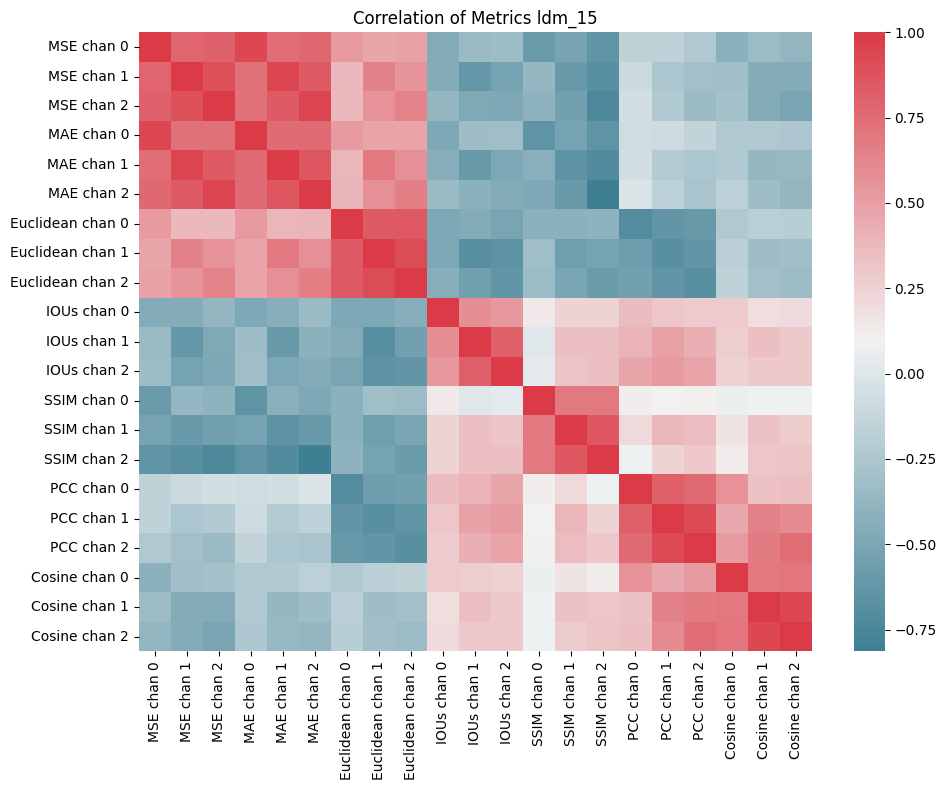

In [104]:
col_order = ["MSE", "MAE", "Euclidean", "IOUs", "SSIM", "PCC", "Cosine"]
col_order = [col + " chan " + str(i) for col in col_order for i in range(3)]
print(col_order)
for i, model in enumerate(model_names):
    df = data[i].copy()
    df[["Cosine chan 0", "Cosine chan 1", "Cosine chan 2"]] *= -1
    df[["Cosine chan 0", "Cosine chan 1", "Cosine chan 2"]] += 1
    df = df[col_order]
    corr = df.corr()
    plt.clf()
    plt.figure(figsize=(10,8))
    cmap = sb.diverging_palette(220, 10, as_cmap=True)
    sb.heatmap(corr, cmap=cmap)
    plt.title(f"Correlation of Metrics {model}")
    plt.tight_layout()
    plt.savefig(f"data/figures/cormatrix_{model}.jpg")



In [7]:
cols = [col for col in means.columns if "2" in col]
print(cols)
display(means[cols])

['MSE chan 2', 'MAE chan 2', 'SSIM chan 2', 'IOUs chan 2', 'PCC chan 2', 'Euclidean chan 2', 'Cosine chan 2']


,MSE chan 2,MAE chan 2,SSIM chan 2,IOUs chan 2,PCC chan 2,Euclidean chan 2,Cosine chan 2
model,,,,,,,
auto_123,37.582306,4.276536,0.945939,0.954667,0.996926,1042.763929,0.001111
auto_124,38.471799,4.275607,0.927858,0.941335,0.995607,1065.986621,0.001852
auto_234,64.580475,5.626834,0.927918,0.922229,0.993047,1374.999828,0.002994
ldm_45,176.735146,9.414018,0.864485,0.900975,0.984789,2271.945011,0.005562
ldm_35,190.855882,9.537354,0.837945,0.868605,0.980166,2365.440158,0.008435
ldm_15,540.320222,15.622246,0.752924,0.788920,0.947645,3915.909795,0.022352


In [ ]:
data[3].drop("Cell Area")